In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city= pd.read_csv(city_data_to_load)
df_ride= pd.read_csv(ride_data_to_load)
df_city.head()

# Combine the data into a single dataset

merge_df= pd.merge(df_city, df_ride, on="city")

# Display the data table for preview
merge_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#Set index to view by city
merge_df.set_index('city')

#Average Fare ($) Per City
grpby_city= merge_df.groupby('city')

average_fare= pd.DataFrame(grpby_city ["fare"].mean())

#Total Number of Rides Per City
total_rides = pd.DataFrame(grpby_city["ride_id"].count())
total_rides = total_rides.rename(columns={"ride_id":"total rides"})

#Total Number of Drivers Per City

total_drivers = pd.DataFrame(grpby_city["driver_count"].count())



## Bubble Plot of Ride Sharing Data

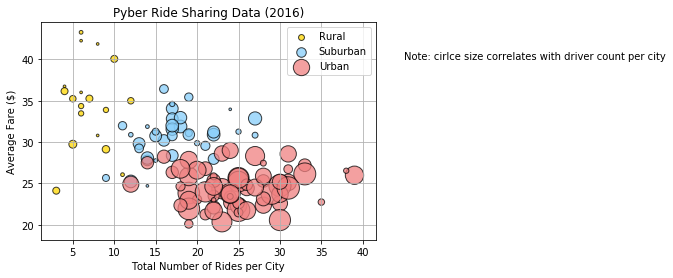

In [3]:
# Obtain the x and y coordinates for each of the three city types
city_data = pd.merge(df_city, average_fare, on="city")
city_datas = pd.merge(city_data, total_rides, on="city")
city_datas = city_datas.rename(columns={"fare": "Average Fare"})

#x axis cooridnates

rural_x= city_datas.loc[city_datas["type"]=="Rural"]    
urban_x= city_datas.loc[city_datas["type"]=="Urban"]  
suburban_x = city_datas.loc[city_datas["type"]=="Suburban"]  

city_datas.head()
# Build the scatter plots for each city types

plt.scatter(rural_x["total rides"], rural_x["Average Fare"], s = rural_x["driver_count"]*7, 
            color="Gold", edgecolor = "black", label="Rural", alpha = 0.75)
plt.scatter(suburban_x["total rides"], suburban_x["Average Fare"], s = suburban_x["driver_count"]*7, 
            color="lightskyblue", edgecolor = "black", label="Suburban", alpha = 0.75)
plt.scatter(urban_x["total rides"], urban_x["Average Fare"], s = urban_x["driver_count"]*7,
            color="lightcoral", edgecolor = "black", label="Urban", alpha =0.75)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.text(45, 40, 'Note: cirlce size correlates with driver count per city')
plt.legend(loc="best", fontsize = "medium", fancybox=True)

plt.savefig("images/Pyber Ride Sharing Data")

plt.show()

## Total Fares by City Type

<function matplotlib.pyplot.show(*args, **kw)>

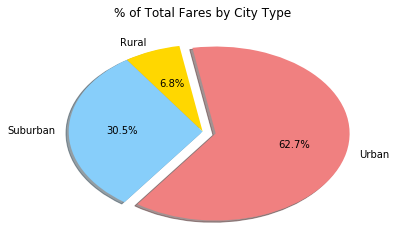

In [4]:
# Calculate Type Percents

groupby_type =  merge_df.groupby("type")
total_fare_type = groupby_type["fare"].sum()
total_fare = merge_df["fare"].sum()
percentage_fare = round(total_fare_type/total_fare *100, 1)


# Build Pie Chart
labels= ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["Gold", "lightskyblue", "lightcoral"]
plt.title("% of Total Fares by City Type")

plt.pie(percentage_fare, explode=explode, colors= colors, labels=labels, autopct="%1.1f%%", shadow=True,startangle=100)
# Save Figure

plt.savefig("images/% of Total Fares by City Type.png")
#display figure
plt.show

## Total Rides by City Type

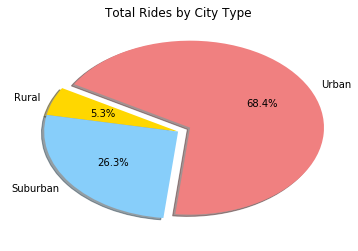

In [10]:
# Calculate Ride Percents

total_rides_bytype = pd.DataFrame(merge_df.groupby('type')["ride_id"].count())
total_rides_bytype = total_rides_bytype.rename(columns={"ride_id":"Total Rides"})

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
Total_Rides = total_rides_bytype["Total Rides"]
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

plt.title("Total Rides by City Type")
plt.pie(Total_Rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle = 150)

# Save Figure
plt.savefig("images/Total Rides by City Type")

plt.show()

## Total Drivers by City Type

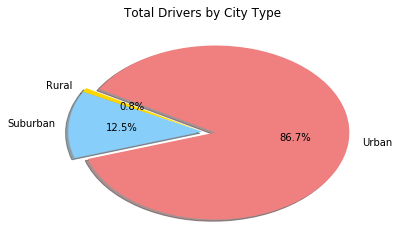

In [14]:
# Calculate Driver Percents
drivers_bytype = pd.DataFrame(merge_df.groupby('type')["driver_count"].sum())
drivers_bytype = drivers_bytype.rename(columns={"driver_count":"Total # of Drivers"})


# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
Drivers = drivers_bytype["Total # of Drivers"]
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

plt.title("Total Drivers by City Type")
plt.pie(Drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle = 150)

# Save Figure
plt.savefig("images/Total Drivers by City Type")

plt.show()

Oberservable Trends

1. It is obersvable that less rides occur in rural areas because the fares much higher so it may not be as economic of a choice for people traveling father distances.

2. There was not much of a difference between the average ride fares for Rural and Suburban. Both are traveling farther distances than urban so the average fares aren't very different. 

3. Pyber should focus most of its efforst on Urban riders. Even though the fares are uch less, the frequency of rides is much higher than rural and suburban riders. 